### SMM284 Coursework Part1 plain vanilla descent 

In [7]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
class gd_pv_2d:
    
    def __init__(self, fn_loss, fn_grad):
        self.fn_loss = fn_loss
        self.fn_grad = fn_grad

    def find_min(self, x_init, n_iter, eta, tol):
        x = x_init
        
        loss_path = []
        x_path = []
        
        x_path.append(x)
        loss_this = self.fn_loss(x)
        loss_path.append(loss_this)
        g = self.fn_grad(x)

        for i in range(n_iter):
            if g[0] < tol[0] and g[1] < tol[1] :
                break
            g = self.fn_grad(x)
            x[0] += -eta[0] * g[0]
            x[1] += -eta[1] * g[1]
            x = [x[0],x[1]]
            x_path.append(x)
            loss_this = self.fn_loss(x)
            loss_path.append(loss_this)
            
        self.loss_path = loss_path
        self.x_path = x_path
        self.loss_fn_min = loss_this
        self.x_at_min = x

In [9]:
# test the classes with 2d functions 
def fn_loss(x):
    x_1 = x[0]
    x_2 = x[1]
    y = (4-2.1*x_1**2+x_1**4/3)*x_1**2 +x_1*x_2 + (-4+4*x_2**2)*x_2**2
    return y
    
def fn_grad(x):
    x_1 = x[0]
    x_2 = x[1]
    delta_1 = 8*x_1-8.4*x_1**3+2*x_1**5+x_2
    delta_2 = -8*x_2 + 16*x_2**3 + x_1
    return np.array([delta_1, delta_2])

In [10]:
# initiate a 2d_pd class with given fn and gradient
solver = gd_pv_2d(fn_loss = fn_loss, fn_grad = fn_grad)

# finding the local minimum using solver

x_init = [0.1,0]

n_iter = 10000
eta = [0.001,0.001]
tol = np.array([1e-5,1e-5])

solver.find_min(x_init, n_iter, eta, tol)
print('The minimum of the loss function is {}'.format(np.round(solver.loss_fn_min, 12)))
print('The value of x which generates the minimum is {}'.format(np.round(solver.x_at_min, 7)))

The minimum of the loss function is -1.031628453008
The value of x which generates the minimum is [ 0.0898309 -0.7126551]


** plot the results in 3D graph **

Text(0.5, 0, 'loss fn')

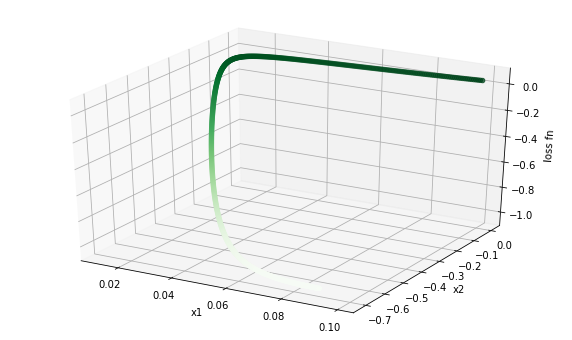

In [11]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection='3d')


# Data for three-dimensional scattered points
zdata = solver.loss_path
xdata = np.array(solver.x_path)[:,0]
ydata = np.array(solver.x_path)[:,1]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('loss fn')

Text(0.5, 0, 'z')

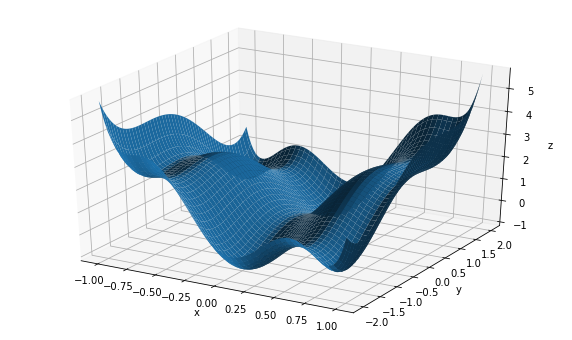

In [24]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
Z_data = np.zeros([len(x),len(x)])

X_data, Y_data = np.meshgrid(x, y)

for i in range(len(x)):
    for j in range(len(x)):
        x_ = [x[i], y[j]]
        Z_data[i,j] = fn_loss(x_)
    

fig = plt.figure(figsize = (10, 6))
ax = plt.axes(projection='3d')


ax.plot_surface(Y_data, X_data, Z_data)

#ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
